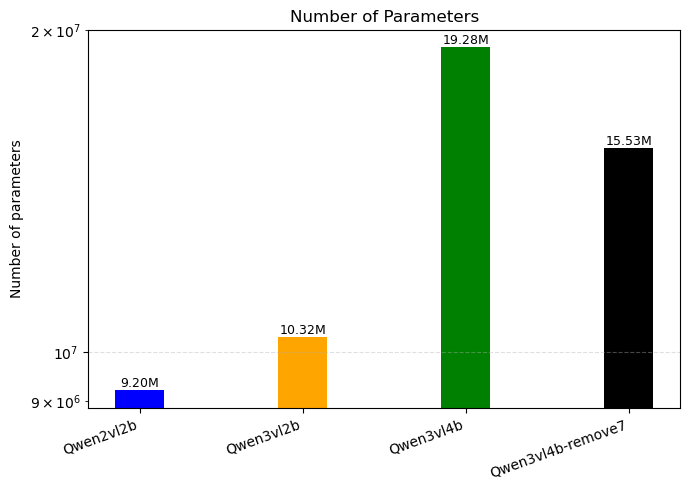

In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Data
# -----------------------------
data = {
    "Qwen2vl2b": 9_203_712,
    "Qwen3vl2b": 10_321_920,
    "Qwen3vl4b": 19_279_872,
    "Qwen3vl4b-remove7": 15_531_008,
}

# Keep order as provided
models = list(data.keys())
params = list(data.values())

# -----------------------------
# Helper functions
# -----------------------------
def human_format(n: int) -> str:
    """Convert large integer to human-readable format."""
    if n >= 1_000_000_000:
        return f"{n/1_000_000_000:.2f}B"
    if n >= 1_000_000:
        return f"{n/1_000_000:.2f}M"
    if n >= 1_000:
        return f"{n/1_000:.2f}K"
    return str(n)

def annotate_bars(ax, bars):
    """Annotate bars with absolute value and percentage vs first model."""
    base = params[0]
    for i, b in enumerate(bars):
        v = b.get_height()
        pct = (v - base) / base * 100.0
        label = f"{human_format(int(v))}\n({pct:+.1f}%)"
        ax.text(
            b.get_x() + b.get_width() / 2,
            v,
            label,
            ha="center",
            va="bottom",
            fontsize=9,
        )

# # -----------------------------
# # Plot 1: Bar chart
# # -----------------------------
# plt.figure(figsize=(10, 5))
# ax = plt.gca()
# bars = ax.bar(models, params)
# ax.set_title("Model Parameters (Bar Chart)")
# ax.set_ylabel("Number of parameters")
# ax.grid(axis="y", linestyle="--", alpha=0.4)

# annotate_bars(ax, bars)
# plt.xticks(rotation=20, ha="right")
# plt.tight_layout()
# plt.show()

# # -----------------------------
# # Plot 2: Line chart
# # -----------------------------
# plt.figure(figsize=(10, 5))
# ax = plt.gca()
# ax.plot(models, params, marker="o")
# ax.set_title("Model Parameters (Line Chart)")
# ax.set_ylabel("Number of parameters")
# ax.grid(True, linestyle="--", alpha=0.4)

# # Annotate points
# for x, y in zip(models, params):
#     ax.text(x, y, human_format(y), ha="center", va="bottom", fontsize=9)

# plt.xticks(rotation=20, ha="right")
# plt.tight_layout()
# plt.show()

# -----------------------------
# Plot 3: Log-scale bar chart
# -----------------------------
plt.figure(figsize=(7, 5))
ax = plt.gca()
bars = ax.bar(models, params, width=0.3, color=["blue", "orange", "green", "black"])
ax.set_yscale("log")
ax.set_title("Number of Parameters")
ax.set_ylabel("Number of parameters")
ax.grid(axis="y", linestyle="--", alpha=0.4)

# Annotate bars (still show absolute values)
for b in bars:
    v = b.get_height()
    ax.text(
        b.get_x() + b.get_width() / 2,
        v,
        human_format(int(v)),
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()


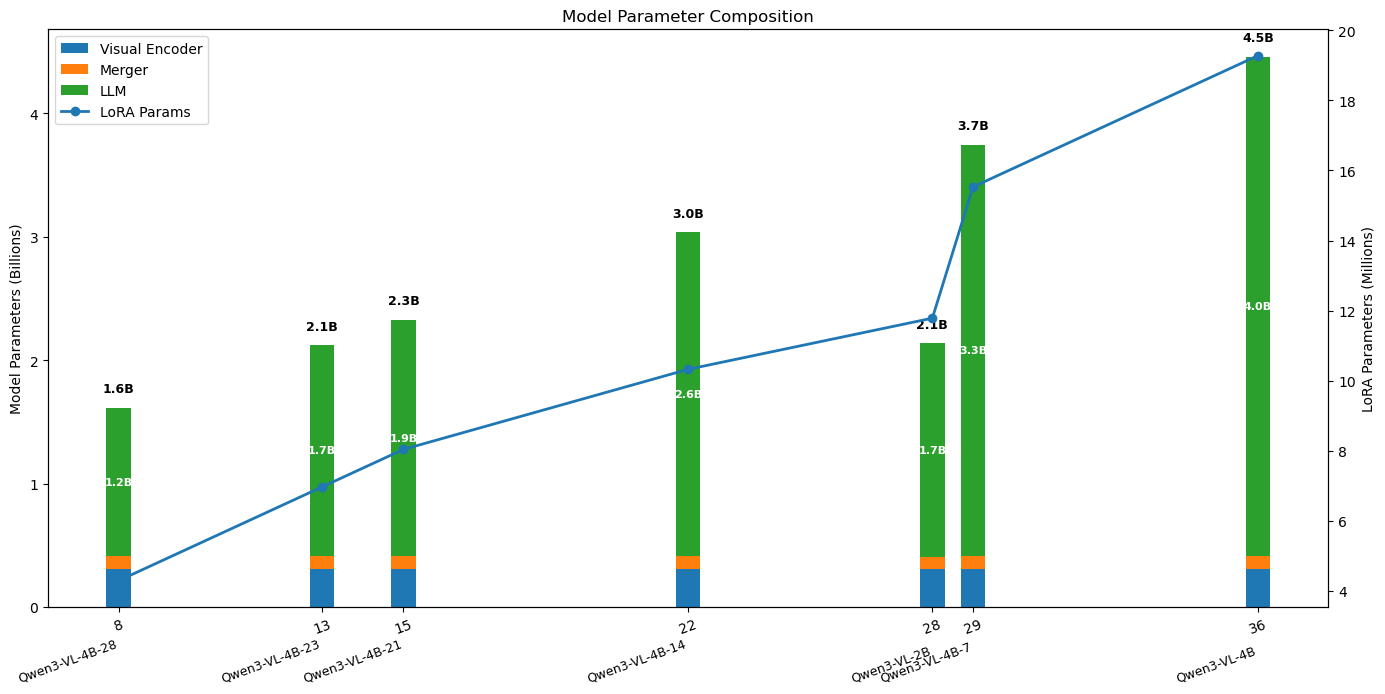

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Data (unit: number of params)
# -----------------------------
models = [
    "Qwen3-VL-4B",
    "Qwen3-VL-4B-7",
    "Qwen3-VL-4B-14",
    "Qwen3-VL-4B-21",
    "Qwen3-VL-4B-23",
    "Qwen3-VL-4B-28",
    "Qwen3-VL-2B",
    # "Qwen2-VL-2B",
]

# layers = np.array([36, 29, 22, 15, 13, 8, 27.65, 28.35])
layers = np.array([36, 29, 22, 15, 13, 8, 28])

visual = np.array([
    306_242_560, 306_242_560, 306_242_560, 306_242_560,
    306_242_560, 306_242_560, 306_242_560, 
    # 631_183_360
])

merger = np.array([
    109_105_152, 109_105_152, 109_105_152, 109_105_152,
    109_105_152, 109_105_152, 100_714_496, 
    # 34_087_936
])

llm = np.array([
    4_041_747_968, 3_331_483_392, 2_621_218_816, 1_910_954_240,
    1_708_021_504, 1_200_689_664, 1_730_896_896, 
    # 1_552_918_016
])

lora = np.array([
    19_279_872, 15_531_008, 11_782_144, 8_033_280,
    6_962_176, 4_284_416, 10_321_920, 
    # 9_203_712
])

total = visual + merger + llm

# Convert to Millions for plotting
visual_m = visual / 1e9
merger_m = merger / 1e9
llm_m = llm / 1e9
total_m = total / 1e9
lora_m = lora / 1e6

# -----------------------------
# Plot
# -----------------------------
# x = np.arange(len(models))
width = 0.6

fig, ax1 = plt.subplots(figsize=(14, 7))

# Stacked bars
p1 = ax1.bar(layers, visual_m, width, label='Visual Encoder')
p2 = ax1.bar(layers, merger_m, width, bottom=visual_m, label='Merger')
p3 = ax1.bar(layers, llm_m, width, bottom=visual_m + merger_m, label='LLM')

# Left axis label
ax1.set_ylabel("Model Parameters (Billions)")
ax1.set_title("Model Parameter Composition")
# ax1.set_xticks(x)
# ax1.set_xlabel("LLM layers")
ax1.set_xticks(layers)
# ax1.set_xticklabels(models, rotation=20)
ax1.set_xticklabels([round(layer) for layer in layers], rotation=20)
for i, name in enumerate(models):
    ax1.text(layers[i], -0.6, name, rotation=20, ha='right', fontsize=9)


# Annotate TOTAL at top of each bar
for i in range(len(layers)):
    ax1.text(
        layers[i],
        total_m[i] + 0.1,
        f"{total_m[i]:.1f}B",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# Annotate LLM value inside LLM block
for i in range(len(layers)):
    y_pos = visual_m[i] + merger_m[i] + llm_m[i] / 2
    ax1.text(
        layers[i],
        y_pos,
        f"{llm_m[i]:.1f}B",
        ha='center',
        va='center',
        fontsize=8,
        color='white',
        fontweight='bold'
    )

# -----------------------------
# LoRA line (secondary axis)
# -----------------------------
ax2 = ax1.twinx()
ax2.plot(sorted(layers), sorted(lora_m), marker='o', linewidth=2, label='LoRA Params')
ax2.set_ylabel("LoRA Parameters (Millions)")

# Legends
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()
